In [42]:
import torch
from PIL import Image

In [43]:
import numpy as np

In [55]:
gt_param = torch.load('./gt_param_debug.pth')
strategy_check = torch.load('./strategy_check.pth')

In [45]:
old = torch.load('./old.pth')

In [46]:
render = torch.load('./render.pth')

In [56]:
gt_param.shape, old.shape, render.shape, strategy_check.shape

(torch.Size([6, 10, 9]),
 torch.Size([6, 4, 256, 256]),
 torch.Size([6, 4, 256, 256]),
 torch.Size([1, 4, 4, 256, 256]))

In [48]:
## why 360 ?  batch size was 8, iter was 10, so 8x10x9/2 = 360

In [49]:
old_imgs = []
render_imgs = []
old = old.detach().cpu()
render = render.detach().cpu()
concat_imgs = []
for i in range(old.shape[0]):
    old_temp = old[i,:,:,:].permute(1,2,0)
    render_temp = render[i,:,:,:].permute(1,2,0)
    new_temp = torch.cat([old_temp, render_temp],dim=1)
    old_img = Image.fromarray(np.array(old_temp*255).astype(np.uint8),mode='CMYK').convert('RGB')
    render_img = Image.fromarray(np.array(render_temp*255).astype(np.uint8),mode='CMYK').convert('RGB')
    concat_img = Image.fromarray(np.array(new_temp*255).astype(np.uint8),mode='CMYK').convert('RGB')
    old_imgs.append(old_img)
    render_imgs.append(render_img)
    concat_imgs.append(concat_img)
    concat_img.save('./debug/sample_batch/{}.png'.format(i))
    

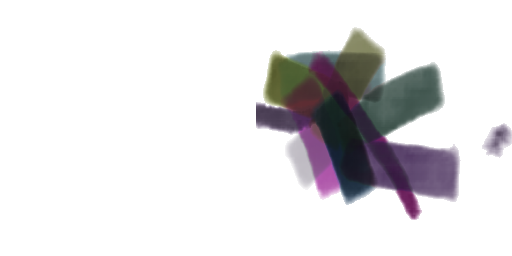

In [29]:
concat_imgs[2]

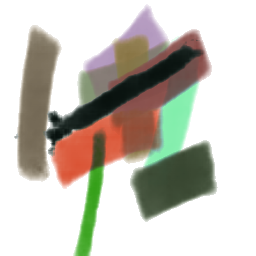

In [54]:
old_imgs[4]

In [58]:
imgs = []
strategy_check = strategy_check.detach().cpu()
for i in range(strategy_check[0].shape[0]):
    img_temp = strategy_check[0,i,:,:,:].permute(1,2,0)
    img_temp = Image.fromarray(np.array(img_temp*255).astype(np.uint8),mode='CMYK').convert('RGB')
    imgs.append(img_temp)


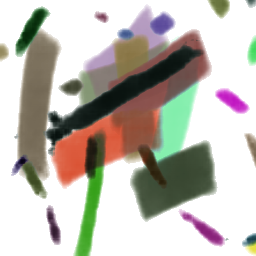

In [64]:
imgs[3]